In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

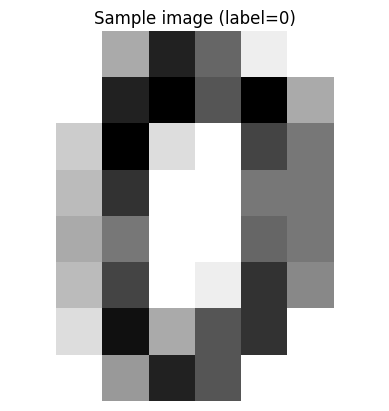

In [3]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Sample image (label={digits.target[0]})")
plt.axis('off')
plt.show()

In [4]:
# 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.2,
    stratify=digits.target,   # 클래스 비율 유지
    random_state=42
)

In [5]:
# 모델 정의
models = {
    "KNN (k=6)": KNeighborsClassifier(n_neighbors=6),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
}

In [6]:
# 학습 & 평가
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracies[name] = acc

In [7]:
# 정확도 출력
print("=== Test Accuracy ===")
for name, acc in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:20s} : {acc:.4f}")

=== Test Accuracy ===
KNN (k=6)            : 0.9806
Random Forest        : 0.9694
Logistic Regression  : 0.9583
Decision Tree        : 0.8250


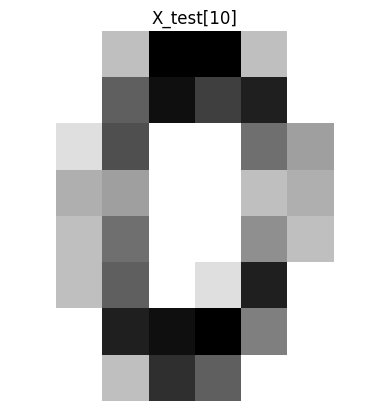


Predictions for X_test[10]:
KNN (k=6)            -> 0 (true: 0)
Decision Tree        -> 0 (true: 0)
Logistic Regression  -> 0 (true: 0)
Random Forest        -> 0 (true: 0)


In [8]:
# 테스트 샘플 하나 시각화 & 각 모델 예측 비교
idx = 10
plt.imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("X_test[10]")
plt.axis('off')
plt.show()

print("\nPredictions for X_test[10]:")
for name, model in models.items():
    pred = model.predict([X_test[idx]])  # 항상 2D 형태 입력
    print(f"{name:20s} -> {pred[0]} (true: {y_test[idx]})")

In [9]:
best_name = max(accuracies, key=accuracies.get)
best_model = models[best_name]
best_pred = best_model.predict(X_test)
cm = metrics.confusion_matrix(y_test, best_pred)
print(f"\nBest model: {best_name}")
print("Confusion Matrix:\n", cm)


Best model: KNN (k=6)
Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  1  0  0  0  1 34]]
